# Projeto de aprendizagem de máquina

Neste projeto seu objetivo é prever o tempo decorrido da postagem até um vídeo entrar nos vídeos em alta do Youtube, utilizando dados que foram retirados do [Kaggle](https://www.kaggle.com/datasnaek/youtube-new). Para isso, você deverá realizar uma classificação, estimando se o vídeo chegará aos vídeos em alta de maneira rápida (fast), normal ou demorada (slow), ou seja, em menos de 1 dias, entre 1 e 3 dias ou mais de 3 dias, respectivamente. 

Para tornar o processo mais interessante, você deverá participar de uma competição com os demais alunos da turma, com objetivo de obter os melhores resultados. Segue o [link da competição](https://www.kaggle.com/c/youtube-trending-classification/overview).

Antes de rodar os modelos de aprendizagem de máquina, você deverá fazer uma breve análise, procurando por: 
* Valores estranhos
* Distribuição de valores, focando em distribuições enviesadas
* Correlação entre a variável alvo e as demais variáveis

Em seguida, você treinará modelos de regressão e classificação. Para isso, siga os seguintes passos:
1. Utilize apenas o conjunto de treino para encontrar os melhores modelos e parâmetros. Separe este conjunto em treino e teste na proporção 80%/20% respectivamente.
2. Treine os modelos, fazendo uma comparação breve entre o [F1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) a cada rodada (o parâmetro average deve ser 'micro').
    * Um modelo simples - seu baseline
        * Remova o id, transforme a data em um valor numérico e transforme as variáveis categóricas em dummies.
        * Crie um modelo simples, como regressão linear, knn ou árvore de decisão.
        * Compute o F1-score
    * Feature engineering
        * Nas variáveis que você identificou como sendo enviesadas aplique o log nelas.
        * Treine novamente com os novos dados.
        * Compute o F1-score
    * Feature scaling
        * Utilize o feature scaling para deixar as variáveis na mesma escala.
        * Treine novamente com novos dados
        * Compute o F1-score
    * Feature selection
        * Remova a variável com menor correlação com a variável alvo.
        * Treine novamente com novos dados
        * Compute o F1-score
    * Treinando diferentes modelos
        * Treine agora com outro modelo de sua escolha
        * Compute o F1-score
3. De posse do modelo, parâmetros e transformações que você encontrou os melhores resultados:
    * Treine novamente, mas agora com todo o conjunto de dados de treino disponível no Kaggle
    * Teste com o conjunto de teste provido lá
    * Crie um novo dataframe que tenha uma coluna com o id dos vídeos de teste e outra coluna com as predições
    * Salve o dataframe em um CSV
    * Submeta na competição seu resultado.

Dicas opcionais que podem melhorar seus resultados:
* Crie novas variáveis a partir das existentes, por exemplo, o dia da semana, se é final de semana ou não, qual a hora ou mês da publicação ou ainda algum cálculo que envolva a quantidade de likes, deslikes e comentários.
* Remova as observações que possuem outliers na variável alvo.
* Aplique o log na variável alvo e após a predição aplique o exponencial.
* Utilize [balanceamento de classes](https://elitedatascience.com/imbalanced-classes)

Para facilitar, deixei disponível no github os dados de treino e teste do Kaggle:

##Importando Libs e funções

###Importanto Libs

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
import numpy as np
from sklearn.metrics import confusion_matrix

kaggle_train = pd.read_csv("https://orionwinter.github.io/datasets/youtube_classification_train.csv")
kaggle_test = pd.read_csv("https://orionwinter.github.io/datasets/youtube_classification_test.csv")

###Importando Funções

In [0]:
def feature_scaling(data):
    sc = StandardScaler()
    return sc.fit_transform(data)

##Etapa de exploração e tratamento dos dados

In [0]:
kaggle_train.head()

,video_id,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending_class
0,2kyS6SvSYSE,22,2017-11-13 17:13:01,748374,57527,2966,15954,False,False,False,fast
1,5qpjK5DgCt4,23,2017-11-12 19:05:24,3191434,146033,5339,8181,False,False,False,fast
2,puqaWrEC7tY,24,2017-11-13 11:00:04,343168,10172,666,2146,False,False,False,fast
3,d380meD0W0M,24,2017-11-12 18:01:41,2095731,132235,1989,17518,False,False,False,fast
4,gHZ1Qz0KiKM,28,2017-11-13 19:07:23,119180,9763,511,1434,False,False,False,fast


In [0]:
kaggle_test.head()

,video_id,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,1ZAPwfrtAFY,24,2017-11-13 07:30:00,2418783,97185,6146,12703,False,False,False
1,39idVpFF7NQ,24,2017-11-12 05:37:17,2103417,15993,2445,1970,False,False,False
2,ZAQs-ctOqXQ,23,2017-11-12 17:00:05,295639,8011,638,1256,False,False,False
3,vU14JY3x81A,27,2017-11-13 14:00:03,115791,9586,75,2800,False,False,False
4,_-aDHxoblr4,27,2017-11-13 16:00:03,144418,11758,89,1014,False,False,False


In [0]:
kaggle_train.describe()

,category_id,views,likes,dislikes,comment_count
count,5080.000000,5.080000e+03,5.080000e+03,5080.000000,5080.000000
mean,20.376181,7.460394e+05,3.536727e+04,1497.897047,4698.230709
std,7.292690,1.873860e+06,1.237033e+05,13316.925818,23448.765306
min,1.000000,5.490000e+02,0.000000e+00,0.000000,0.000000
25%,17.000000,8.341525e+04,1.882750e+03,72.000000,256.750000
50%,24.000000,2.688860e+05,7.977000e+03,239.000000,916.000000
75%,25.000000,7.428820e+05,2.513000e+04,750.250000,2840.250000
max,43.000000,3.934993e+07,3.880071e+06,629120.000000,733373.000000


In [0]:
kaggle_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5080 entries, 0 to 5079
Data columns (total 11 columns):
video_id                  5080 non-null object
category_id               5080 non-null int64
publish_time              5080 non-null object
views                     5080 non-null int64
likes                     5080 non-null int64
dislikes                  5080 non-null int64
comment_count             5080 non-null int64
comments_disabled         5080 non-null bool
ratings_disabled          5080 non-null bool
video_error_or_removed    5080 non-null bool
trending_class            5080 non-null object
dtypes: bool(3), int64(5), object(3)
memory usage: 332.5+ KB


In [0]:
kaggle_train[kaggle_train.isnull().values.any(axis=1)]

,video_id,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending_class


Não existem valores nulos no dataset.

In [0]:
comments_disabled = kaggle_train.query("comments_disabled==True")
comments_disabled.count()

video_id                  81
category_id               81
publish_time              81
views                     81
likes                     81
dislikes                  81
comment_count             81
comments_disabled         81
ratings_disabled          81
video_error_or_removed    81
trending_class            81
dtype: int64

In [0]:
comments_disabled.head(5)

,video_id,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending_class
72,9oFP-pOMNwE,24,2017-11-09 08:01:40,264793,3283,853,0,True,False,False,slow
235,KLZl_sxSN_g,25,2017-11-08 19:23:52,1338,4,0,0,True,False,False,slow
317,77McSTzTgg8,25,2017-11-15 21:05:13,38528,283,218,0,True,False,False,normal
398,Kn5UgGQukYQ,1,2016-10-14 21:14:51,15058,0,0,0,True,True,False,slow
520,1lGHZ5NMHRY,28,2017-11-22 20:00:01,687321,21479,2345,0,True,False,False,fast


In [0]:
video_error_or_removed = kaggle_train.query("video_error_or_removed==True")
video_error_or_removed.count()

video_id                  3
category_id               3
publish_time              3
views                     3
likes                     3
dislikes                  3
comment_count             3
comments_disabled         3
ratings_disabled          3
video_error_or_removed    3
trending_class            3
dtype: int64

In [0]:
video_error_or_removed.head(5)

,video_id,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending_class
532,RK_B4Ez4_5Q,24,2017-11-23 19:51:07,2618344,45197,2315,3332,False,False,True,fast
4405,q8v9MvManKE,1,2018-04-21 15:00:50,397920,11932,348,2845,False,False,True,fast
4591,1Aoc-cd9eYs,24,2018-05-02 16:02:35,833027,28696,3766,5033,False,False,True,normal


In [0]:
not_rated = kaggle_train.query("ratings_disabled==True")
not_rated.count()

video_id                  22
category_id               22
publish_time              22
views                     22
likes                     22
dislikes                  22
comment_count             22
comments_disabled         22
ratings_disabled          22
video_error_or_removed    22
trending_class            22
dtype: int64

In [0]:
not_rated.head(5)

,video_id,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending_class
398,Kn5UgGQukYQ,1,2016-10-14 21:14:51,15058,0,0,0,True,True,False,slow
501,_akwfRuL4os,22,2017-11-21 19:29:03,160012,0,0,1722,False,True,False,fast
561,tj3EKWwIulQ,24,2017-11-22 19:00:16,3560,0,0,0,True,True,False,normal
666,nx1R-eHSkfM,10,2017-11-29 14:00:03,867588,0,0,0,True,True,False,fast
697,aLSG3178eD4,29,2017-11-28 13:00:35,1456,0,0,0,True,True,False,fast


In [0]:
not_rated = kaggle_train.query("ratings_disabled==True")['category_id'].count()
comments_disabled = kaggle_train.query("comments_disabled==True")['category_id'].count()
video_error_or_removed = kaggle_train.query("video_error_or_removed==True")['category_id'].count()

all = kaggle_train['category_id'].count()

print("Como podemos ver pela análise dos dados, os outliers são os videos sem pontuação que totalizam", 
      not_rated, "de um total de", all, "videos, ou seja,", round(not_rated/all*100,2),"%. "+
      "\nTambém temos os videos com comentários desabilitados (", comments_disabled,") que totalizam ", round(comments_disabled/all*100,2),"% "+
      "e os videos video_error_or_removed (",video_error_or_removed,") que totalizam ", round(video_error_or_removed/all*100,2),"%."+
      "\nVideos cujos comentários foram desabilitados tem a contagem de comentários zerada, "+
      "\nbem como videos com o rating desabilitado não tem likes e deslikes contabilizados. \nPortanto, essas são as váriaveis enviesadas.")

Como podemos ver pela análise dos dados, os outliers são os videos sem pontuação que totalizam 22 de um total de 5080 videos, ou seja, 0.43 %. 
Também temos os videos com comentários desabilitados ( 81 ) que totalizam  1.59 % e os videos video_error_or_removed ( 3 ) que totalizam  0.06 %.
Videos cujos comentários foram desabilitados tem a contagem de comentários zerada, 
bem como videos com o rating desabilitado não tem likes e deslikes contabilizados. 
Portanto, essas são as váriaveis enviesadas.


In [0]:
kaggle_train.describe()

,category_id,views,likes,dislikes,comment_count
count,5080.000000,5.080000e+03,5.080000e+03,5080.000000,5080.000000
mean,20.376181,7.460394e+05,3.536727e+04,1497.897047,4698.230709
std,7.292690,1.873860e+06,1.237033e+05,13316.925818,23448.765306
min,1.000000,5.490000e+02,0.000000e+00,0.000000,0.000000
25%,17.000000,8.341525e+04,1.882750e+03,72.000000,256.750000
50%,24.000000,2.688860e+05,7.977000e+03,239.000000,916.000000
75%,25.000000,7.428820e+05,2.513000e+04,750.250000,2840.250000
max,43.000000,3.934993e+07,3.880071e+06,629120.000000,733373.000000


In [0]:
kaggle_train.head()

,video_id,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending_class
0,2kyS6SvSYSE,22,2017-11-13 17:13:01,748374,57527,2966,15954,False,False,False,fast
1,5qpjK5DgCt4,23,2017-11-12 19:05:24,3191434,146033,5339,8181,False,False,False,fast
2,puqaWrEC7tY,24,2017-11-13 11:00:04,343168,10172,666,2146,False,False,False,fast
3,d380meD0W0M,24,2017-11-12 18:01:41,2095731,132235,1989,17518,False,False,False,fast
4,gHZ1Qz0KiKM,28,2017-11-13 19:07:23,119180,9763,511,1434,False,False,False,fast


In [0]:
#kaggle_train = kaggle_train.drop(columns=['video_id','ratings_disabled'])
kaggle_train = kaggle_train.drop(columns=['video_id'])

In [0]:
kaggle_train['publish_time'] = pd.to_datetime(kaggle_train['publish_time'])
kaggle_train = kaggle_train.assign(year = kaggle_train.publish_time.dt.year)
kaggle_train = kaggle_train.assign(month = kaggle_train.publish_time.dt.month)
kaggle_train = kaggle_train.assign(day = kaggle_train.publish_time.dt.day)
kaggle_train = kaggle_train.assign(hour = kaggle_train.publish_time.dt.hour)
kaggle_train = kaggle_train.assign(minute = kaggle_train.publish_time.dt.minute)
kaggle_train = kaggle_train.assign(second = kaggle_train.publish_time.dt.second)
kaggle_train = kaggle_train.assign(weekday = kaggle_train.publish_time.dt.weekday)
kaggle_train = kaggle_train.assign(weekend = np.where(kaggle_train.publish_time.dt.weekday < 5, 0 , 1))#0=mon to fri; 1= sat, sun
kaggle_train['publish_time'] = pd.to_datetime(kaggle_train['publish_time']).astype(int)
kaggle_train.head()

,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending_class,year,month,day,hour,minute,second,weekday,weekend
0,22,1510593181000000000,748374,57527,2966,15954,False,False,False,fast,2017,11,13,17,13,1,0,0
1,23,1510513524000000000,3191434,146033,5339,8181,False,False,False,fast,2017,11,12,19,5,24,6,1
2,24,1510570804000000000,343168,10172,666,2146,False,False,False,fast,2017,11,13,11,0,4,0,0
3,24,1510509701000000000,2095731,132235,1989,17518,False,False,False,fast,2017,11,12,18,1,41,6,1
4,28,1510600043000000000,119180,9763,511,1434,False,False,False,fast,2017,11,13,19,7,23,0,0


In [0]:
le = preprocessing.LabelEncoder()
kaggle_train['comments_disabled'] = le.fit_transform(kaggle_train['comments_disabled'])
kaggle_train['video_error_or_removed'] = le.fit_transform(kaggle_train['video_error_or_removed'])
kaggle_train['ratings_disabled'] = le.fit_transform(kaggle_train['ratings_disabled'])
kaggle_train.head()

,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending_class,year,month,day,hour,minute,second,weekday,weekend
0,22,1510593181000000000,748374,57527,2966,15954,0,0,0,fast,2017,11,13,17,13,1,0,0
1,23,1510513524000000000,3191434,146033,5339,8181,0,0,0,fast,2017,11,12,19,5,24,6,1
2,24,1510570804000000000,343168,10172,666,2146,0,0,0,fast,2017,11,13,11,0,4,0,0
3,24,1510509701000000000,2095731,132235,1989,17518,0,0,0,fast,2017,11,12,18,1,41,6,1
4,28,1510600043000000000,119180,9763,511,1434,0,0,0,fast,2017,11,13,19,7,23,0,0


In [0]:
kaggle_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5080 entries, 0 to 5079
Data columns (total 18 columns):
category_id               5080 non-null int64
publish_time              5080 non-null int64
views                     5080 non-null int64
likes                     5080 non-null int64
dislikes                  5080 non-null int64
comment_count             5080 non-null int64
comments_disabled         5080 non-null int64
ratings_disabled          5080 non-null int64
video_error_or_removed    5080 non-null int64
trending_class            5080 non-null object
year                      5080 non-null int64
month                     5080 non-null int64
day                       5080 non-null int64
hour                      5080 non-null int64
minute                    5080 non-null int64
second                    5080 non-null int64
weekday                   5080 non-null int64
weekend                   5080 non-null int64
dtypes: int64(17), object(1)
memory usage: 714.5+ KB


In [0]:
kaggle_train.describe()

,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,year,month,day,hour,minute,second,weekday,weekend
count,5080.000000,5.080000e+03,5.080000e+03,5.080000e+03,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000
mean,20.376181,1.515650e+18,7.460394e+05,3.536727e+04,1497.897047,4698.230709,0.015945,0.004331,0.000591,2017.601969,5.633858,15.526181,13.559055,19.345866,20.930315,2.622638,0.173819
std,7.292690,1.999049e+16,1.873860e+06,1.237033e+05,13316.925818,23448.765306,0.125275,0.065672,0.024296,0.777360,4.388205,8.449711,6.479165,19.754605,18.922570,1.839151,0.378991
min,1.000000,1.153643e+18,5.490000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.513184e+18,8.341525e+04,1.882750e+03,72.000000,256.750000,0.000000,0.000000,0.000000,2017.000000,2.000000,8.000000,9.000000,0.000000,3.000000,1.000000,0.000000
50%,24.000000,1.516852e+18,2.688860e+05,7.977000e+03,239.000000,916.000000,0.000000,0.000000,0.000000,2018.000000,4.000000,15.000000,15.000000,14.000000,16.000000,3.000000,0.000000
75%,25.000000,1.520897e+18,7.428820e+05,2.513000e+04,750.250000,2840.250000,0.000000,0.000000,0.000000,2018.000000,11.000000,22.000000,18.000000,35.000000,37.000000,4.000000,0.000000
max,43.000000,1.528913e+18,3.934993e+07,3.880071e+06,629120.000000,733373.000000,1.000000,1.000000,1.000000,2018.000000,12.000000,31.000000,23.000000,59.000000,59.000000,6.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff769d82ba8>,
      dtype=object)

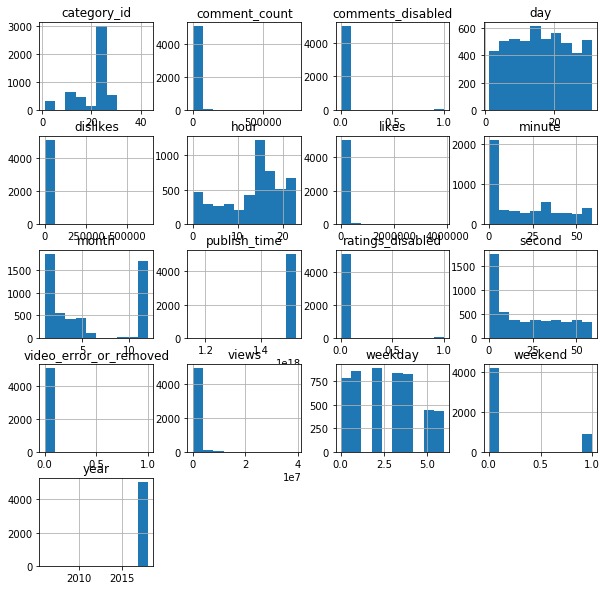

In [0]:
kaggle_train.hist(figsize=(10,10),bins=10)

In [0]:
X = kaggle_train[kaggle_train.columns[~kaggle_train.columns.isin(['trending_class'])]].values

#X = kaggle_train.iloc[:,:9].values
X[:5]

array([[                 22, 1510593181000000000,              748374,
                      57527,                2966,               15954,
                          0,                   0,                   0,
                       2017,                  11,                  13,
                         17,                  13,                   1,
                          0,                   0],
       [                 23, 1510513524000000000,             3191434,
                     146033,                5339,                8181,
                          0,                   0,                   0,
                       2017,                  11,                  12,
                         19,                   5,                  24,
                          6,                   1],
       [                 24, 1510570804000000000,              343168,
                      10172,                 666,                2146,
                          0,                  

In [0]:
y = kaggle_train['trending_class'].values
y[:5]

array(['fast', 'fast', 'fast', 'fast', 'fast'], dtype=object)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

print("Tamanho do Dataset. {}".format(kaggle_train.shape[0]))
print("Tamanho do Conjunto de Treinamento. {}".format(len(X_train)))
print("Tamanho do Conjunto de Testes. {}".format(len(X_test)))

Tamanho do Dataset. 5080
Tamanho do Conjunto de Treinamento. 4064
Tamanho do Conjunto de Testes. 1016


##Etapa de Treinamento e Classificação do Modelo

###Base line (Decision Tree)

In [0]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
f1_score(y_test, y_pred,average='micro') 

0.6791338582677166

###Feature Engineering

In [0]:
kaggle_train_log = kaggle_train
kaggle_train_log['views'] = np.where(kaggle_train_log.views > 0, np.log(kaggle_train_log['views']) , 0)
kaggle_train_log['likes'] = np.where(kaggle_train_log.likes > 0, np.log(kaggle_train_log['likes']) , 0)
kaggle_train_log['dislikes'] = np.where(kaggle_train_log.dislikes > 0, np.log(kaggle_train_log['dislikes']) , 0)
kaggle_train_log['comment_count'] = np.where(kaggle_train_log.comment_count > 0, np.log(kaggle_train_log['comment_count']) , 0)
X_log = kaggle_train_log[kaggle_train_log.columns[~kaggle_train_log.columns.isin(['trending_class'])]].values
y_log = kaggle_train_log['trending_class'].values
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size = .2, random_state = 42)
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_log, y_train_log)
y_pred = classifier.predict(X_test_log)
f1_score(y_test_log, y_pred,average='micro') 

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.6771653543307087

Aplicar log piorou um pouco o resultado do modelo. Por isso, não treinei outros modelos com ele. 

###Feature Scalling

In [0]:
X_train_scaled = feature_scaling(X_train)
X_test_scaled = feature_scaling(X_test)

In [0]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
f1_score(y_test, y_pred,average='micro') 

0.6791338582677166

O Scaling melhorou um pouco o resulado do f1 score, por isso optei por fazer o teste com todos os modelos utilizando as variaveis com e sem escala. 

###Feature Selection

In [0]:
kaggle_train_removed_variable = kaggle_train.drop(columns=['video_error_or_removed'])
X_removed_variable = kaggle_train_removed_variable[kaggle_train_removed_variable.columns[~kaggle_train_removed_variable.columns.isin(['trending_class'])]].values
y_removed_variable = kaggle_train_removed_variable['trending_class'].values
X_train_removed_var, X_test_removed_var, y_train_removed_var, y_test_removed_var = train_test_split(X_removed_variable, y_removed_variable, test_size = .2, random_state = 42)
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_removed_var, y_train_removed_var)
y_pred = classifier.predict(X_test_removed_var)
f1_score(y_test_removed_var, y_pred,average='micro') 

0.6732283464566929

In [0]:
X_train_scaled_removed_var = feature_scaling(X_train_removed_var)
X_test_scaled_removed_var = feature_scaling(X_test_removed_var)
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_scaled_removed_var, y_train_removed_var)
y_pred = classifier.predict(X_test_scaled_removed_var)
f1_score(y_test_removed_var, y_pred,average='micro') 

0.577755905511811

Retirar a coluna video_error_or_removed piorou o resultado. Portanto, optei por mante-la no modelo. 

###Treinando Modelos Diferentes

In [0]:
estimators = {'Decision Tree': DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
              'KNN': KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
              'Logistic Regression': LogisticRegression(random_state = 0),
              'Naive Bayes': GaussianNB(),
              'Random Forest': RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0),
              'SVC': SVC(kernel = 'rbf', random_state = 0)}


In [0]:
df_results = pd.DataFrame(columns=['clf','f1'], index=None)


Teste sem scaling com todo dataset

In [0]:
for name, estim in estimators.items():
        
    # Treinando os classificadores com Conjunto de Treinamento
    estim.fit(X_train, y_train)
    
    # Prevendo os resultados do modelo criado com o conjunto de testes
    y_pred = estim.predict(X_test)
        
    # Armazenando as métricas de cada classificador em um dataframe
    df_results.loc[len(df_results), :] = [name + " No Scaling", f1_score(y_test, y_pred,  average = 'micro')]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Teste sem scaling sem coluna videos_error_or_removed

In [0]:
for name, estim in estimators.items():
        
    # Treinando os classificadores com Conjunto de Treinamento
    estim.fit(X_train_removed_var, y_train_removed_var)
    
    # Prevendo os resultados do modelo criado com o conjunto de testes
    y_pred = estim.predict(X_test_removed_var)
        
    # Armazenando as métricas de cada classificador em um dataframe
    df_results.loc[len(df_results), :] = [name + " No Scaling Removed Var", f1_score(y_test_removed_var, y_pred,  average = 'micro')]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Teste com scaling com todo dataset

In [0]:
for name, estim in estimators.items():
        
    # Treinando os classificadores com Conjunto de Treinamento
    estim.fit(X_train_scaled, y_train)
    
    # Prevendo os resultados do modelo criado com o conjunto de testes
    y_pred = estim.predict(X_test_scaled)
        
    # Armazenando as métricas de cada classificador em um dataframe
    df_results.loc[len(df_results), :] = [name + " Scaled Variables", f1_score(y_test, y_pred,  average = 'micro')]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Teste com scaling com todo dataset sem coluna videos_error_or_removed

In [0]:
for name, estim in estimators.items():
        
    # Treinando os classificadores com Conjunto de Treinamento
    estim.fit(X_train_scaled_removed_var, y_train)
    
    # Prevendo os resultados do modelo criado com o conjunto de testes
    y_pred = estim.predict(X_test_scaled_removed_var)
        
    # Armazenando as métricas de cada classificador em um dataframe
    df_results.loc[len(df_results), :] = [name + " Scaled Variables Removed Var", f1_score(y_test, y_pred,  average = 'micro')]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
df_results.sort_values(by='f1',ascending=False)

,clf,f1
4,Random Forest No Scaling,0.790354
10,Random Forest No Scaling Removed Var,0.777559
7,KNN No Scaling Removed Var,0.776575
1,KNN No Scaling,0.775591
20,Logistic Regression Scaled Variables Removed Var,0.755906
23,SVC Scaled Variables Removed Var,0.753937
9,Naive Bayes No Scaling Removed Var,0.749016
3,Naive Bayes No Scaling,0.749016
14,Logistic Regression Scaled Variables,0.748031
17,SVC Scaled Variables,0.747047


###Resultado dos testes de modelo de regressão

Melhor modelo: Random forest sem scaling e com variaveis adicionais e sem remoção de colunas

###Treinar com o conjunto inteiro utilizando o modelo Random Forest

In [0]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

###Testar com o conjunto do Kaggle utilizando o modelo Random Forest

*   List item
*   List item



In [0]:
kaggle_test_video_id = kaggle_test['video_id'].values
kaggle_test = kaggle_test.drop(columns=['video_id'])
kaggle_test['publish_time'] = pd.to_datetime(kaggle_test['publish_time'])
kaggle_test = kaggle_test.assign(year = kaggle_test.publish_time.dt.year)
kaggle_test = kaggle_test.assign(month = kaggle_test.publish_time.dt.month)
kaggle_test = kaggle_test.assign(day = kaggle_test.publish_time.dt.day)
kaggle_test = kaggle_test.assign(hour = kaggle_test.publish_time.dt.hour)
kaggle_test = kaggle_test.assign(minute = kaggle_test.publish_time.dt.minute)
kaggle_test = kaggle_test.assign(second = kaggle_test.publish_time.dt.second)
kaggle_test = kaggle_test.assign(weekday = kaggle_test.publish_time.dt.weekday)
kaggle_test = kaggle_test.assign(weekend = np.where(kaggle_test.publish_time.dt.weekday < 5, 0 , 1))#0=mon to fri; 1= sat, sun
kaggle_test['publish_time'] = pd.to_datetime(kaggle_test['publish_time']).astype(int)
kaggle_test['comments_disabled'] = le.fit_transform(kaggle_test['comments_disabled'])
kaggle_test['video_error_or_removed'] = le.fit_transform(kaggle_test['video_error_or_removed'])
kaggle_test['ratings_disabled'] = le.fit_transform(kaggle_test['ratings_disabled'])

In [0]:
kaggle_test

,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,year,month,day,hour,minute,second,weekday,weekend
0,24,1510558200000000000,2418783,97185,6146,12703,0,0,0,2017,11,13,7,30,0,0,0
1,24,1510465037000000000,2103417,15993,2445,1970,0,0,0,2017,11,12,5,37,17,6,1
2,23,1510506005000000000,295639,8011,638,1256,0,0,0,2017,11,12,17,0,5,6,1
3,27,1510581603000000000,115791,9586,75,2800,0,0,0,2017,11,13,14,0,3,0,0
4,27,1510588803000000000,144418,11758,89,1014,0,0,0,2017,11,13,16,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,10,1528732803000000000,1859909,351531,2361,26907,0,0,0,2018,6,11,16,0,3,0,0
1267,20,1528662501000000000,1052924,36438,692,8398,0,0,0,2018,6,10,20,28,21,6,1
1268,23,1528736400000000000,226849,5788,130,242,0,0,0,2018,6,11,17,0,0,0,0
1269,20,1528939913000000000,1549110,21905,1516,1318,0,0,0,2018,6,14,1,31,53,3,0


In [0]:
X = kaggle_test.values

In [0]:
y_pred = classifier.predict(X)

In [0]:
y_pred

array(['fast', 'fast', 'fast', ..., 'fast', 'fast', 'fast'], dtype=object)

In [0]:
len(y_pred)

1271

In [0]:
kaggle_test.count()

category_id               1271
publish_time              1271
views                     1271
likes                     1271
dislikes                  1271
comment_count             1271
comments_disabled         1271
ratings_disabled          1271
video_error_or_removed    1271
year                      1271
month                     1271
day                       1271
hour                      1271
minute                    1271
second                    1271
weekday                   1271
weekend                   1271
dtype: int64

In [0]:
df_results_test= pd.DataFrame(columns=['video_id','trending_class'], index=None)

In [0]:
for i in range(0, len(y_pred)):
    df_results_test.loc[i, :] = [kaggle_test_video_id[i], y_pred[i]]

In [0]:
df_results_test

,video_id,trending_class
0,1ZAPwfrtAFY,fast
1,39idVpFF7NQ,fast
2,ZAQs-ctOqXQ,fast
3,vU14JY3x81A,fast
4,_-aDHxoblr4,fast
...,...,...
1266,DGzy8FE1Rhk,fast
1267,gPtU_-N6dMg,fast
1268,6fi1RZNWCDI,fast
1269,8O-ZUXGcuWU,fast


###Exportando Resultado Final

In [0]:
df_results_test.to_csv(r'video_trending_result-Bruno.csv', index = None, header=True)

from google.colab import files
files.download("video_trending_result-Bruno.csv")